In [1]:
import numpy as np
import pylab as py

def gabor(Fs, T, t0, f, sig, phi, A): #definiuje funkcje
    dt = 1./Fs #odleglosc miedzy probkami
    t = np.arange(0,T,dt)#wetktor czasu
    s = A * np.exp(- ((t-t0)**2) / (2*sig**2)) * np.cos(2*np.pi*f*t+phi)
    return (s,t)#zwracam wktor czasu i wartosci

def periodogram(s, w, fs, k=1):
    s_okno = s * (1./np.sqrt(np.sum(w**2))) * w #splot i normalizacja
    ft = np.fft.fft(s_okno, len(s_okno)*k) #fourier
    fr = np.fft.fftfreq(len(ft), 1./fs) # biny
    return fr, np.abs(ft)**2 #zwracam wektor binow i wartosci


In [2]:
Fs = 128
f1 = 10.2
f2 = 42.
fg = 31.25
A1 = 2
A2 = 1
Ag = 1.5
fi1 = np.pi/4
fi2 = np.pi/3
fig = 1.5
T = 20

In [3]:
#rozdzielczosc czest to Fs/N zeby rozdz byla 0.05 musze wziac Fs*20 probek
time = np.arange(0,T,1./Fs)
sin1 = A1*np.sin(2*np.pi*time*f1+fi1)
sin2 = A2*np.sin(2*np.pi*time*f2+fi2)
gabor = gabor(Fs,T,10,fg,1,0,fig) #t0 w w polowie sygnalu 20/2=10

signal = sin1+sin2+gabor[0] #skladam sygnal
moc = signal**2 #wyznaczam wektor mocy chwilowej

okno = np.hamming(len(signal)) # okno do periodogramu
perio = periodogram(signal, okno, Fs)

energia w czestosci wynosi: 
energia w czasie wynosi: 
moc niesiona przez skladowa o czestosci 31.25 wynosi: 


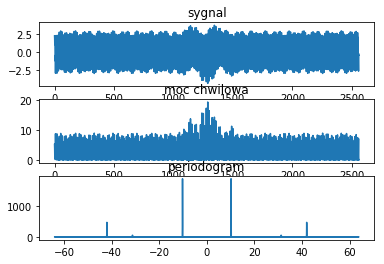

In [4]:
#rysuje sygnal

py.subplot(311)
py.plot(signal)
py.title('sygnal')
#rysuje moc chwilowa
py.subplot(312)
py.plot(moc)
py.title('moc chwilowa')# widac wzrost mocy w srodku, tam gdzie jest gabor
py.subplot(313)
py.plot(perio[0],perio[1])
py.title('periodogram') #widac trzy skladowe

#energia sygnalu w czestosci
print ("energia w czestosci wynosi: ") , np.sum(perio[1])
print ("energia w czasie wynosi: "), np.sum(moc) #roznica wynika z okienkowania nieprostokatnym oknem

#szukam indeksu binu dla czestosci 31,25
idx = np.where(perio[0]==31.25)[0][0]
print ("moc niesiona przez skladowa o czestosci 31.25 wynosi: "), perio[1][idx]
py.show()